# Linear Regression Regularization

Linear models are typically thought of being models more prone to bias than variance when looking at the [bias-variance tradeoff](https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff). However, when you have many features relative to your number of observations, linear models can be prone to overfitting and thus high bias. This can be mitigated through regularization.

Regulariztion, in the machine learning context means reducing the influence a feature has on predicting a label. For example, dropout in neural networks randomly turns of nodes reducing their output's incluence in making the final prediction. Regularization in the linear model works by biasing the coefficients in the linear model towards zero. This decreases variance, while increasing bias. 

Biasing the coefficients towards zero is accomplished by penalizing high magnitudes of coefficients in the loss function, which is predominantly done in 2 ways. Choozing the optimal size of the penalty is typically accomplished in [cross-validation](https://en.wikipedia.org/wiki/Cross-validation_(statistics)).

First a refresher of basic linear regression. akdf ja

## Linear Regression Basics

Linear regression is an often underrated tool in the machine learning toolkit (in my opinion). I cannot give linear models the treatment they deserve in this article, but I will give a brief overview. Linear models assume a model of the form:

$y_i = \beta_0 + \beta_1 x_{i1} + \beta_2x _{i2} + ... + \beta_k x_{ik} + \epsilon_i$

where $y_i$ is the label of the *i*-th observation, $\hat{\beta}_j$ is the coefficient for the *j*-th variable, $x_{ij}$ is the value for the *j*-th variable for the *i*-th observation, and $\epsilon_i$ is the random error for the *i*-th observation. Making some *hopefully* reasonable assumptions about $\epsilon_i$ allows us to use our model to make inferences, but that is not germane to this article.

By far the most common loss function used in linear regression is the sum of squared residuals (SSR), which is just summing the squared error for each training observation. Linear regression using this loss function is called Ordinary Least Squares ([OLS](https://en.wikipedia.org/wiki/Ordinary_least_squares)) regression. Minimizing SSR is equivalent to minimizing the mean squared error (MSE). Although the SSR is the most common loss function in linear regression, there are others. Two you should know are [Least Absolute Deviation](https://en.wikipedia.org/wiki/Least_absolute_deviations) and [Huber Loss](https://en.wikipedia.org/wiki/Huber_loss), which are less sensitive to outliers. Their details are not discussed here, but you should know them so you have them in your toolkit.

### Solving for the coefficients in OLS.

Our objective in matrix form is:

### $\text{min }_{\hat{\beta}} ((y - X\hat{\beta})^T(y - X\hat{\beta}))$

where $y$ is the column vector of true values, $X$ is the design matrix, and $\hat{\beta}$ is the column vector of coefficient estimates in the linear model. A design matrix has rows representing observations and columns representing variables, typically the first column is all 1s for the intercept term.

Using summation notation, the loss function is:

### $\text{min }_{\hat{\beta}} (\Sigma_{i=1}^n (y_i - (\hat{\beta}_0 + \Sigma^k_{j=1} (\hat{\beta}_j x_{ij})))^2)$

where $y_i$ is the label for the *i*-th observation, $\hat{\beta}_j$ is the estimated coefficient for the *j*-th variable, and $x_{ij}$ is the value for the  *j*-th variable for the *i*-th observation.

When minimizing the SSR, we have an analytical solution called the normal equations:

Our residual vector is

### $\epsilon = y - X\hat{\beta}$

Expanding $\epsilon^T \epsilon$ to get the SSR we get:

### $\epsilon^T \epsilon = y^Ty - 2\hat{\beta}^T X^T y + \hat{\beta}^TX^TX\hat{\beta}$

Our loss function will be at a local minima (or maxima) when the first derivative with respect to the estimated coefficients is zero. Taking the first derivative of the loss with respect to the coefficients we have:

### $\frac{d \epsilon^T \epsilon}{d\hat{\beta}} = - 2 X^T y + 2 X^TX\hat{\beta}$

Setting the derivative of our loss to zero we get:

### $0 = - 2 X^T y + 2 X^TX\hat{\beta}$

Now we can start solving for the coefficient vector. First we move the $-2 X^T y$ from the left side to the right.

### $2 X^T y = 2 X^TX\hat{\beta}$

Now we can divide away the $2$s.

### $X^T y = X^TX\hat{\beta}$

Then we can isolate $\hat{\beta}$ by multiplying both sides by the inverse of $X^TX$.

### $(X^TX)^{-1}X^T y = \hat{\beta}$

We now have the closed form solution for the coefficients that minimize the sum of squared residuals:

### $\hat{\beta} = (X^TX)^{-1}X^T y$

In practice, the coefficients in a linear model are not estimated this way directly. Inverting a matrix can be numerically unstable, so your favorite stats/machine learning library uses a method like [singular value decomposition](https://en.wikipedia.org/wiki/Singular_value_decomposition), or [QR decomposition](https://en.wikipedia.org/wiki/QR_decomposition) to estimate the coefficients in OLS. I used singular value decomposition in my implementation.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from LinearModel import OLS, Ridge
from helpers import make_datasets

size = 2000
cols = 3
eta = 1

X_train, y_train, X_test, y_test = make_datasets(size, cols, num_zero=1, beta_scale=1., eta=1)

In [2]:
my_ols = OLS()
my_ols.fit(X_train, y_train)  

print(f"Model df: {my_ols.df_model}")
print(f"Residual df: {my_ols.df_residuals}")
print(f"R-squared: {round(my_ols.R_sq, 4)}")
print(f"Adj. R-squared: {round(my_ols.adj_R_sq, 4)}")
print(f"F-stat: {round(my_ols.F_stat, 4)}")
print(f"F-prob: {round(my_ols.F_prob, 4)}")
print(f"Est. Coef.: {np.round(my_ols.beta_hat, 4)}")
print(f"Est. Coef. Std. Error: {np.round(my_ols.beta_hat_se, 4)}")
print(f"t-stats: {np.round(my_ols.beta_hat_t_stats, 4)}")
print(f"P(|t-stat| > 0): {np.round(my_ols.beta_hat_prob, 4)}")

Model df: 3
Residual df: 996
R-squared: 0.9002
Adj. R-squared: 0.8999
F-stat: 2993.9391
F-prob: 0.0
Est. Coef.: [ 0.9893 -2.8303  0.7886 -0.035 ]
Est. Coef. Std. Error: [0.0311 0.0315 0.0304 0.0319]
t-stats: [ 31.8331 -89.7663  25.9239  -1.0985]
P(|t-stat| > 0): [0.     0.     0.     0.2722]


Now that you're an expert in the loss function of OLS, we can move on to the regularized linear models.

## LASSO (L1-Norm Regularization)

The least absolute shrinkage and selection operator, or the LASSO, performs both regularization and variable selection. When the penalty term is high enough some or all coefficients can be zero. The LASSO is escpecially useful when there are many variables and only a few are likely to be related to the quanitity being predicted.

The loss function to be minimized is:

### $\text{min }_{\hat{\beta}} (\Sigma_{i=1}^n (y_i - \Sigma^k_{j=1} (\hat{\beta}_j x_{ij}))^2 + \lambda \Sigma_{l=1}^k |\hat{\beta}_l|)$

Alternatively, it can be written as a constrained optimization problem:

### $\text{min }_{\hat{\beta}} (\Sigma_{i=1}^n (y_i - \Sigma^k_{j=1} (\hat{\beta}_j x_{ij}))^2)$, s.t. $t \geq \Sigma_{l=1}^k |\hat{\beta}_l|)$

where $t$ is like a budget for how large the sum of the absolute values of the coefficients can be.

The absolute value operation is not differentiable and the loss function has no closed form solution. Therefore it needs to be solved numerically.

In [3]:
from LinearModel import LASSO

X_train, y_train, X_test, y_test = make_datasets(1000, 10, num_zero=round(cols/0.5), beta_scale=1., eta=1)

my_lasso = LASSO()
my_lasso.fit(X_train, y_train, alpha=10.0, method='Powell')
my_lasso.beta_hat

array([-1.09066714e-02, -2.07968766e+00,  1.15639693e-01, -4.96379663e-02,
       -1.27491946e+00, -6.86830178e-01,  1.57268458e-11,  4.69290108e-01,
        4.70102298e-01, -6.41151680e-02])

In [4]:
my_lasso = LASSO()
my_lasso.fit(X_train, y_train, alpha=50.0, method='Powell')
my_lasso.beta_hat

array([ 0.        , -1.53141545,  0.        ,  0.        , -0.76006622,
       -0.09672143,  0.        ,  0.11052446,  0.27880356,  0.        ])

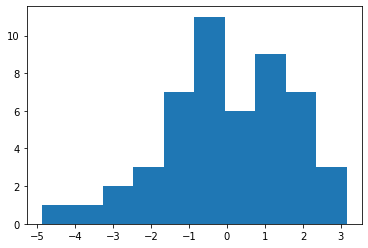

In [5]:
plt.hist(y_test-my_lasso.predict(X_test))
plt.show()

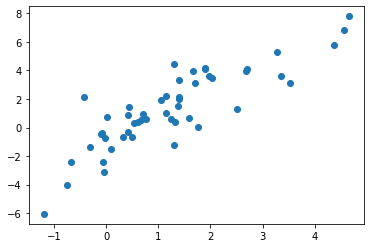

In [6]:
plt.scatter(my_lasso.predict(X_test), y_test)
plt.show()

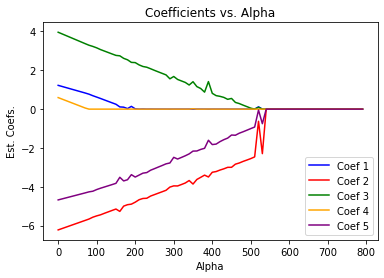

In [25]:
X_train, y_train, X_test, y_test = make_datasets(100, 5, num_zero=0, beta_scale=4., eta=1, seed=2)

coef_1, coef_2, coef_3, coef_4, coef_5 = [], [], [], [], []

alphas = np.arange(0., 800., 10)
for alpha in alphas:
    my_lasso = LASSO()
    my_lasso.standardize = True
    my_lasso.fit(X_train, y_train, alpha=alpha) 

    for i in range(len(my_lasso.beta_hat)):
        beta_hat = my_lasso.beta_hat[i]
        if i == 0:
            coef_1.append(beta_hat)
        elif i == 1:
            coef_2.append(beta_hat)
        elif i == 2:
            coef_3.append(beta_hat)
        elif i == 3:
            coef_4.append(beta_hat)
        else:
            coef_5.append(beta_hat)
        
plt.plot(alphas, coef_1, color="blue", label="Coef 1")
plt.plot(alphas, coef_2, color="red", label="Coef 2")
plt.plot(alphas, coef_3, color="green", label="Coef 3")
plt.plot(alphas, coef_4, color="orange", label="Coef 4")
plt.plot(alphas, coef_5, color="purple", label="Coef 5")
plt.title("Coefficients vs. Alpha")
plt.xlabel("Alpha")
plt.ylabel("Est. Coefs.")
plt.legend(loc="lower right")
plt.show()

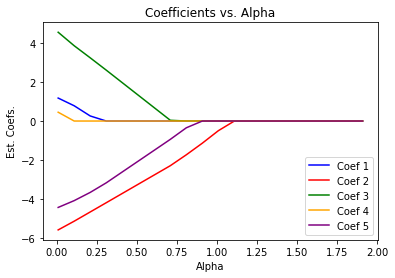

In [23]:
from sklearn.linear_model import Lasso

X_train, y_train, X_test, y_test = make_datasets(100, 5, num_zero=0, beta_scale=4., eta=1, seed=2)

coef_1, coef_2, coef_3, coef_4, coef_5 = [], [], [], [], []

alphas = np.arange(0.01, 2.01, 0.1)
for alpha in alphas:
    my_lasso = Lasso(alpha=alpha, normalize=True)
    my_lasso.fit(X_train, y_train) 

    for i in range(len(my_lasso.coef_)):
        beta_hat = my_lasso.coef_[i]
        if i == 0:
            coef_1.append(beta_hat)
        elif i == 1:
            coef_2.append(beta_hat)
        elif i == 2:
            coef_3.append(beta_hat)
        elif i == 3:
            coef_4.append(beta_hat)
        else:
            coef_5.append(beta_hat)
        
plt.plot(alphas, coef_1, color="blue", label="Coef 1")
plt.plot(alphas, coef_2, color="red", label="Coef 2")
plt.plot(alphas, coef_3, color="green", label="Coef 3")
plt.plot(alphas, coef_4, color="orange", label="Coef 4")
plt.plot(alphas, coef_5, color="purple", label="Coef 5")
plt.title("Coefficients vs. Alpha")
plt.xlabel("Alpha")
plt.ylabel("Est. Coefs.")
plt.legend(loc="lower right")
plt.show()

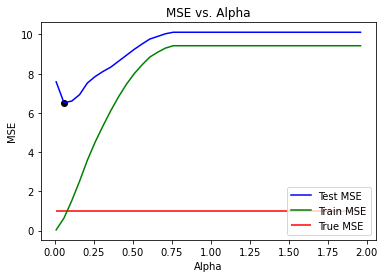

In [35]:
cols = 500
size = 500
eta = 1

X_train, y_train, X_test, y_test = make_datasets(size, cols, num_zero=round(cols/1.75), beta_scale=0.2, eta=1)

X_std = (X_train - np.mean(X_train, axis=0))/np.std(X_train, axis=0)
X_std_test = (X_test - np.mean(X_train, axis=0))/np.std(X_train, axis=0)

mse = []
train_mse = []
alphas = np.arange(0.01, 2, 0.05)
for alpha in alphas:
    my_lasso = Lasso(alpha=alpha, normalize=False)
    my_lasso.fit(X_train, y_train) 
    training_mse = np.mean((y_train - my_lasso.predict(X_train))**2)
    train_mse.append(training_mse)
    test_mse = np.mean((y_test - my_lasso.predict(X_test))**2)
    mse.append(test_mse)

plt.plot(alphas, mse, color="blue", label="Test MSE")
plt.plot(alphas, train_mse, color="green", label="Train MSE")
plt.hlines(y=eta, xmin=np.min(alphas), xmax=np.max(alphas), color="red", label="True MSE")
plt.scatter(alphas[np.argmin(mse)], mse[np.argmin(mse)], color="black")
plt.legend(loc="best")
plt.title("MSE vs. Alpha")
plt.xlabel("Alpha")
plt.ylabel("MSE")
plt.show()

Now that you've mastered the LASSO, let's move on to ridge regression.

## Ridge Regression (L2-Norm Regularization)

Ridge regression performs regularization by penalizing the sum of squared coefficients. Unlike the LASSO it does not set coefficients to zero when the penalty is high enough so it does not perform variable selection. Ridge regression is escpecially useful when there are many variables and many of them are likely to be related to the quanitity being predicted, or there is [multicollinearity](https://en.wikipedia.org/wiki/Multicollinearity#:~:text=Multicollinearity%20refers%20to%20a%20situation,equal%20to%201%20or%20%E2%88%921.) between some of the features.

The loss function to be minimized is:

### $\text{min }_{\hat{\beta}} (\Sigma_{i=1}^n (y_i - \Sigma^k_{j=1} (\hat{\beta}_j x_{ij}))^2 + \lambda \Sigma_{l=1}^k (\hat{\beta}_l)^2)$

Unlike the LASSO, ridge regression has a closed form solution that can be obtained by solving the normal equations adding in the sum of squared coefficients multiplied by the penalty.

### $\text{min }_{\hat{\beta}} ((y - X\hat{\beta})^T(y - X\hat{\beta}) + \lambda \hat{\beta}^T\hat{\beta})$

Following the steps to solve the normal equation gets you:

### $\hat{\beta}_{\text{ridge}} = (X^TX + \lambda I_p)^{-1}X^T y$

where $I_p$ is the $kxk$ identity matrix and $k$ is the number of features.

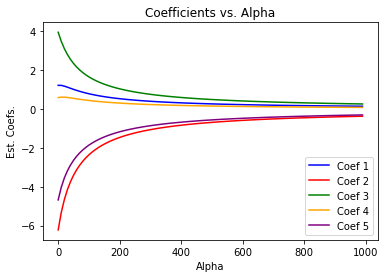

In [8]:
X_train, y_train, X_test, y_test = make_datasets(100, 5, num_zero=0, beta_scale=4., eta=1, seed=2)

coef_1, coef_2, coef_3, coef_4, coef_5 = [], [], [], [], []

alphas = np.arange(0., 1000., 10)
for alpha in alphas:
    my_ridge = Ridge()
    my_ridge.fit(X_train, y_train, alpha=alpha) 

    for i in range(len(my_ridge.beta_hat)):
        beta_hat = my_ridge.beta_hat[i]
        if i == 0:
            coef_1.append(beta_hat)
        elif i == 1:
            coef_2.append(beta_hat)
        elif i == 2:
            coef_3.append(beta_hat)
        elif i == 3:
            coef_4.append(beta_hat)
        else:
            coef_5.append(beta_hat)
        
plt.plot(alphas, coef_1, color="blue", label="Coef 1")
plt.plot(alphas, coef_2, color="red", label="Coef 2")
plt.plot(alphas, coef_3, color="green", label="Coef 3")
plt.plot(alphas, coef_4, color="orange", label="Coef 4")
plt.plot(alphas, coef_5, color="purple", label="Coef 5")
plt.title("Coefficients vs. Alpha")
plt.xlabel("Alpha")
plt.ylabel("Est. Coefs.")
plt.legend(loc="lower right")
plt.show()

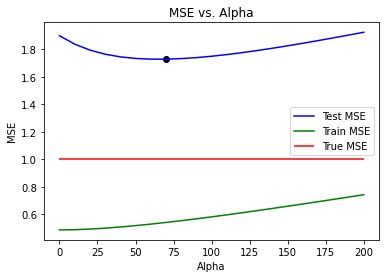

In [9]:
cols = 500
eta = 1

X_train, y_train, X_test, y_test = make_datasets(size, cols, num_zero=round(cols/1.5), beta_scale=0.2, eta=1)

X_std = (X_train - np.mean(X_train, axis=0))/np.std(X_train, axis=0)
X_std_test = (X_test - np.mean(X_train, axis=0))/np.std(X_train, axis=0)

mse = []
train_mse = []
alphas = np.arange(0, 200+1, 10)
for alpha in alphas:
    my_ridge = Ridge()
    my_ridge.fit(X_train, y_train, alpha=alpha) 
    training_mse = np.mean((y_train - my_ridge.predict(X_train))**2)
    train_mse.append(training_mse)
    test_mse = np.mean((y_test - my_ridge.predict(X_test))**2)
    mse.append(test_mse)

plt.plot(alphas, mse, color="blue", label="Test MSE")
plt.plot(alphas, train_mse, color="green", label="Train MSE")
plt.hlines(y=eta, xmin=np.min(alphas), xmax=np.max(alphas), color="red", label="True MSE")
plt.scatter(alphas[np.argmin(mse)], mse[np.argmin(mse)], color="black")
plt.legend(loc="best")
plt.title("MSE vs. Alpha")
plt.xlabel("Alpha")
plt.ylabel("MSE")
plt.show()

# Conclusion

I hope you now have a better understanding of regularization in linear models. Simple modifications to the loss function of OLS are all that's needed to fit models less prone to overfitting, which is usefull when the ratio of variables to observations is high. You also have an idea of how the different errors behave with respect to $\lambda$. 

Further reading:

[Elastic Net Regression](https://en.wikipedia.org/wiki/Elastic_net_regularization) uses both l1-norm and l2-norm regularization.